In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

In [2]:
training_df = pd.read_csv("train.csv")
testing_df = pd.read_csv("test.csv")
test_SalePrice = pd.read_csv("sample_submission.csv",dtype={col: np.float32 for col in ['Id', 'SalePrice']})

In [3]:
training_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


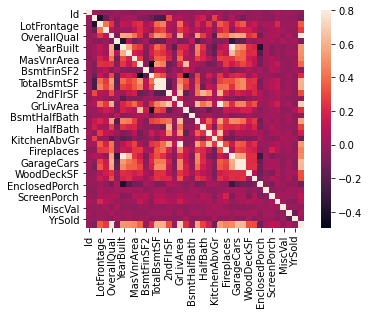

In [4]:
corrmat = training_df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=0.8, square=True);

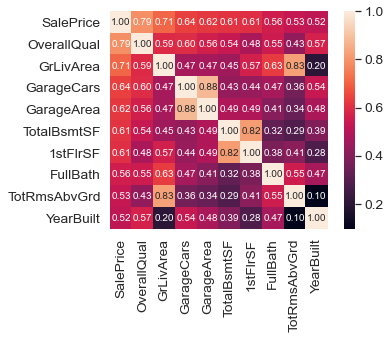

In [5]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(training_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f', annot_kws = {'size':10}, yticklabels=cols.values, xticklabels=cols.values);

In [6]:
total = training_df.isnull().sum().sort_values(ascending=False)
percent= (training_df.isnull().sum()/training_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis = 1, keys=['Total','Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [7]:
training_df = training_df.drop((missing_data[missing_data['Total']>4]).index,axis=1)
training_df = training_df.drop(training_df.loc[training_df['Electrical'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['MSZoning'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtFullBath'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtHalfBath'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['GarageArea'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtFinSF2'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Exterior1st'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['TotalBsmtSF'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['GarageCars'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtUnfSF'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtFinSF1'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['KitchenQual'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['SaleType'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Exterior2nd'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Utilities'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Functional'].isnull()].index)
training_df.isnull().sum().max()
new_testing=pd.merge(testing_df,test_SalePrice, on='Id')

In [8]:
total = testing_df.isnull().sum().sort_values(ascending=False)
percent= (testing_df.isnull().sum()/testing_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis = 1, keys=['Total','Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [9]:
testing_df = testing_df.drop((missing_data[missing_data['Total']>4]).index,axis=1)
testing_df = testing_df.drop(testing_df.loc[testing_df['Electrical'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['MSZoning'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['BsmtFullBath'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['BsmtHalfBath'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['GarageArea'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['BsmtFinSF2'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['Exterior1st'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['TotalBsmtSF'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['GarageCars'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['BsmtUnfSF'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['BsmtFinSF1'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['KitchenQual'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['SaleType'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['Exterior2nd'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['Utilities'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['Functional'].isnull()].index)
testing_df.isnull().sum().max()

0

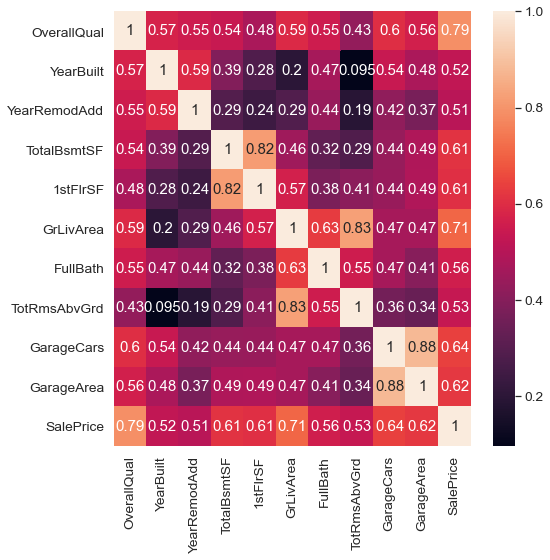

In [10]:
values = training_df.corr().SalePrice[training_df.corr().SalePrice>0.5]
columns = training_df.corr().SalePrice[training_df.corr().SalePrice>0.5].index.to_list()

corr2 = training_df[columns].corr()
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(corr2, annot=True);

In [11]:
#features with corr > 0.5
columns

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [12]:
#dropping missing values from desired features
new_testing[columns].dropna()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0,169277.046875
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0,187758.390625
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0,183583.687500
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0,179317.484375
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0,150730.078125
...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,546.0,546,1092,1,5,0.0,0.0,167081.218750
1455,4,1970,1970,546.0,546,1092,1,6,1.0,286.0,164788.781250
1456,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0,219222.421875
1457,5,1992,1992,912.0,970,970,1,6,0.0,0.0,184924.281250


In [13]:
X = training_df[columns[:-1]].iloc[:,0:].values
y = training_df.iloc[:, -1].values
X2 = new_testing[columns].dropna().drop(columns=['SalePrice'])
X2 = X2[columns[:-1]].iloc[:,0:].values
y2 = new_testing[columns].dropna()[['SalePrice']]
y2 = y2.round().iloc[:, -1].values


In [14]:
#varifying there are no missing values
df_temp = pd.DataFrame(X2)
df_temp.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape,y_train.shape)

(1313, 10) (1313,)


In [16]:
test_SalePrice.max()

Id             2919.00000
SalePrice    281643.96875
dtype: float32

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X2.shape)
print(y2.shape)

(1313, 10)
(1313,)
(1457, 10)
(1457,)


In [19]:
rf = RandomForestRegressor(n_estimators = 150)
rf = rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

#print(rf.score(X2,y2))

0.9776136997075058
0.8696668259397529
-16.974508571224458


In [20]:
pickle.dump(rf,open('rf_model.pkl','wb'))

In [28]:
rf.predict(X2[[1]])[0]

144207.6

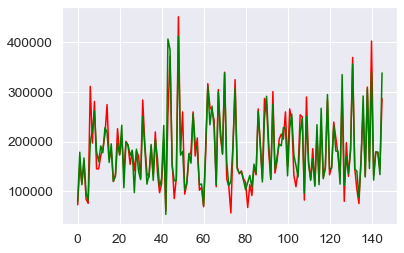

In [29]:
y_predictor = rf.predict(X_test)

plt.figure()
plt.plot(y_test, color='red')
plt.plot(y_predictor, color='green');

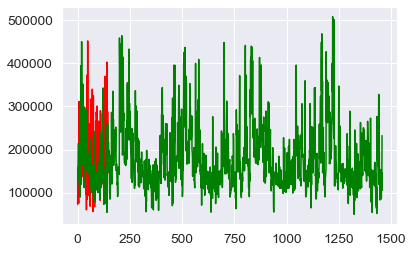

In [30]:
y_predictor = rf.predict(X2)

plt.figure()
plt.plot(y_test, color='red')
plt.plot(y_predictor, color='green');

In [37]:
training_df[columns[:-1]].columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

In [38]:
importances = rf.feature_importances_
sorted(zip(rf.feature_importances_,training_df[columns[:-1]].columns),reverse=True)

[(0.5876967561590977, 'OverallQual'),
 (0.1395844739830411, 'GrLivArea'),
 (0.07358401190533247, 'TotalBsmtSF'),
 (0.049780492752044686, '1stFlrSF'),
 (0.03566207799782246, 'GarageArea'),
 (0.027231196103618634, 'YearRemodAdd'),
 (0.02684649823881256, 'YearBuilt'),
 (0.02434274616029897, 'GarageCars'),
 (0.02130168229588334, 'TotRmsAbvGrd'),
 (0.013970064404048087, 'FullBath')]

In [39]:
from pprint import pprint

In [40]:
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [41]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [42]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,
    param_distributions  = random_grid, n_iter = 100, cv = 3,
    verbose = 2, random_state = 42, n_jobs = -1)
#rf_random.fit(X_train, columns[0:10])
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [44]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100* np.mean( errors / y_test)
    accuracy = 100-mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10,
                                  random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 18979.9580 degrees.
Accuracy = 88.73%.


In [46]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test,y_test)
print(base_model.score(X_train,y_train))
print(base_model.score(X_test,y_test))

Model Performance
Average Error: 17339.5550 degrees.
Accuracy = 89.34%.
0.9765819160496616
0.8493623347617836


In [47]:
print('Improvement of {:0.2f}%.'.format(100*(random_accuracy -base_accuracy)/base_accuracy))

Improvement of 0.69%.


In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap':[True],
    'max_depth':[5,10,15],
    'max_features':[2,3],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[2,3,4,10],
    'n_estimators':[100, 200, 300, 1000]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose=2)

In [49]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  4.0min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [50]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,X_test, y_test)
print(grid_search.score(X_train,y_train))
print(grid_search.score(X_test,y_test))

Model Performance
Average Error: 17441.8378 degrees.
Accuracy = 89.19%.
0.9016092220811843
0.8802860736072081


In [51]:
print('Improvement of {:0.2f}%.'.format(100*(grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.51%.


In [52]:
best_grid

RandomForestRegressor(max_depth=10, max_features=3, min_samples_leaf=4,
                      min_samples_split=10)

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap':[True],
    'max_depth':[8,10,12],
    'max_features':[3,4],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[4,5,6],
    'n_estimators':[350, 400, 500]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose=2)

In [54]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  2.3min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 400}

In [55]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,X_test, y_test)
print(grid_search.score(X_train,y_train))
print(grid_search.score(X_test,y_test))

Model Performance
Average Error: 17231.8486 degrees.
Accuracy = 89.34%.
0.9005758432196088
0.8845931778403278


In [56]:
print('Improvement of {:0.2f}%.'.format(100*(grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.69%.


In [57]:
best_grid

RandomForestRegressor(max_depth=10, max_features=4, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=400)

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap':[True],
    'max_depth':[9,10,11],
    'max_features':[3,4,5,6],
    'min_samples_leaf':[4,5,6],
    'min_samples_split':[4],
    'n_estimators':[325,350,375, 400]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose=2)

In [59]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.7min finished


{'bootstrap': True,
 'max_depth': 9,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 400}

In [60]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,X_test, y_test)
print(grid_search.score(X_train,y_train))
print(grid_search.score(X_test,y_test))

Model Performance
Average Error: 17408.7961 degrees.
Accuracy = 89.32%.
0.9009438556652954
0.8822808865119955


In [61]:
print('Improvement of {:0.2f}%.'.format(100*(grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.66%.


In [62]:
best_grid

RandomForestRegressor(max_depth=9, max_features=5, min_samples_leaf=5,
                      min_samples_split=4, n_estimators=400)

In [63]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap':[True],
    'max_depth':[10],
    'max_features':[5],
    'min_samples_leaf':[4,5],
    'min_samples_split':[4],
    'n_estimators':[335,345,350,355,365]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose=2)

In [64]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.0s finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 365}

In [65]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,X_test, y_test)
print(grid_search.score(X_train,y_train))
print(grid_search.score(X_test,y_test))

Model Performance
Average Error: 17351.0916 degrees.
Accuracy = 89.41%.
0.9146119611753718
0.8814575969858957


In [66]:
print('Improvement of {:0.2f}%.'.format(100*(grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.76%.


In [67]:
best_grid

RandomForestRegressor(max_depth=10, max_features=5, min_samples_leaf=4,
                      min_samples_split=4, n_estimators=365)

In [68]:
pickle.dump(grid_search,open('rf_model_cv.pkl','wb'))